In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import numpy as np

from loader import cityscapesDataset
from loader import utils
from models import unet

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
cd = cityscapesDataset.CityscapesDataset("./data", split='train', target_type='semantic',
                               shrinkToSize=10, cropHeight=256, cropWidth=512)
bs=2
n_classes=19
dl_train = DataLoader(cd, batch_size=bs, num_workers=0, pin_memory=True, shuffle=True)

In [4]:
# learner2 = unet.UNet(3, n_classes).to(device=device)
# learner5 = unet.UNet(3, n_classes).to(device=device)
learner15 = unet.UNet(3, n_classes).to(device=device)

In [5]:
checkpoint = torch.load("saves/dice/save2.pth")
learner2.load_state_dict(checkpoint['model_state_dict'])
startEpoch = checkpoint['epoch']
print("Epoch ",startEpoch," Loaded.")

Epoch  2  Loaded.


In [6]:
checkpoint = torch.load("saves/dice/save5.pth")
learner5.load_state_dict(checkpoint['model_state_dict'])
startEpoch = checkpoint['epoch']
print("Epoch ",startEpoch," Loaded.")

Epoch  5  Loaded.


In [6]:
checkpoint = torch.load("saves/dice/save15.pth")
learner15.load_state_dict(checkpoint['model_state_dict'])
startEpoch = checkpoint['epoch']
print("Epoch ",startEpoch," Loaded.")

Epoch  15  Loaded.


In [7]:
params2 = list(learner2.parameters())
params5 = list(learner5.parameters())

In [8]:
params2[1]

Parameter containing:
tensor([ 2.5706e-09,  2.6832e-15, -4.6488e-06,  3.5078e-19, -1.5032e-07,
        -4.0015e-17, -1.4669e-20, -2.9047e-06, -6.5747e-16, -4.9419e-07,
         2.0269e-19,  1.6252e-09,  7.9336e-17, -2.1834e-11,  2.4027e-15,
        -1.8482e-20,  1.2771e-18,  1.3585e-19, -2.7226e-19, -1.7240e-19,
         2.3330e-15,  1.8846e-06, -8.2256e-13,  1.4253e-08,  2.2872e-07,
        -1.9206e-15, -5.3419e-19, -1.5769e-18, -3.4309e-18,  8.4628e-07,
        -2.2572e-17, -8.7500e-17, -1.8903e-11,  6.4943e-09, -2.8303e-06,
         3.4234e-21,  2.1199e-16, -6.2987e-13,  8.4445e-19, -8.6569e-10,
         3.4417e-20, -1.5502e-06, -5.1535e-06,  3.7387e-19, -8.7312e-13,
        -5.8021e-17,  2.5088e-08, -3.9352e-15,  1.0905e-06, -1.6856e-20,
         1.0799e-06,  5.2505e-16, -1.2614e-16,  2.2094e-16,  3.3727e-16,
        -1.0952e-20, -3.5543e-14,  6.3187e-19, -1.1927e-19,  3.4682e-07,
         3.9675e-14, -8.0799e-19, -2.4858e-06,  3.6562e-13], device='cuda:0',
       requires_grad=Tru

In [9]:
params5[1]

Parameter containing:
tensor([ 4.9781e-35,  3.8904e-40, -2.6118e-28, -6.1124e-40, -2.0841e-32,
        -1.9284e-40, -1.0441e-39, -2.2836e-29,  4.1233e-40,  2.9888e-31,
        -1.9468e-40,  1.6917e-37, -7.3972e-40,  5.5600e-37, -7.0728e-40,
        -6.5883e-40, -7.5631e-40,  9.6835e-40, -1.1172e-39, -3.7096e-40,
         4.6938e-41, -1.7712e-29,  1.8291e-38, -2.5679e-34,  4.0754e-32,
        -4.4463e-41,  1.1322e-39,  3.0417e-40, -5.0164e-40,  1.6180e-30,
        -7.7566e-40, -3.1890e-40, -1.6098e-36, -5.0625e-35, -1.3488e-29,
         5.8160e-40, -6.8170e-40, -1.4746e-38, -3.4700e-40,  1.9790e-35,
        -1.1174e-39,  6.4667e-30, -1.5190e-28, -1.0136e-39,  2.9310e-38,
         1.2927e-41,  9.5426e-34,  7.1600e-40,  2.3169e-30,  1.6174e-39,
         2.3491e-30,  2.2655e-40, -7.7282e-40,  7.8613e-42,  5.7101e-40,
        -1.1237e-39, -1.5074e-39,  5.7765e-40, -3.6258e-40, -1.3387e-31,
         1.3995e-39, -3.6771e-40,  1.5589e-29,  1.1705e-38], device='cuda:0',
       requires_grad=Tru

C:\Users\risha\Anaconda3\envs\Rishabh\lib\site-packages\torch\nn\modules\upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


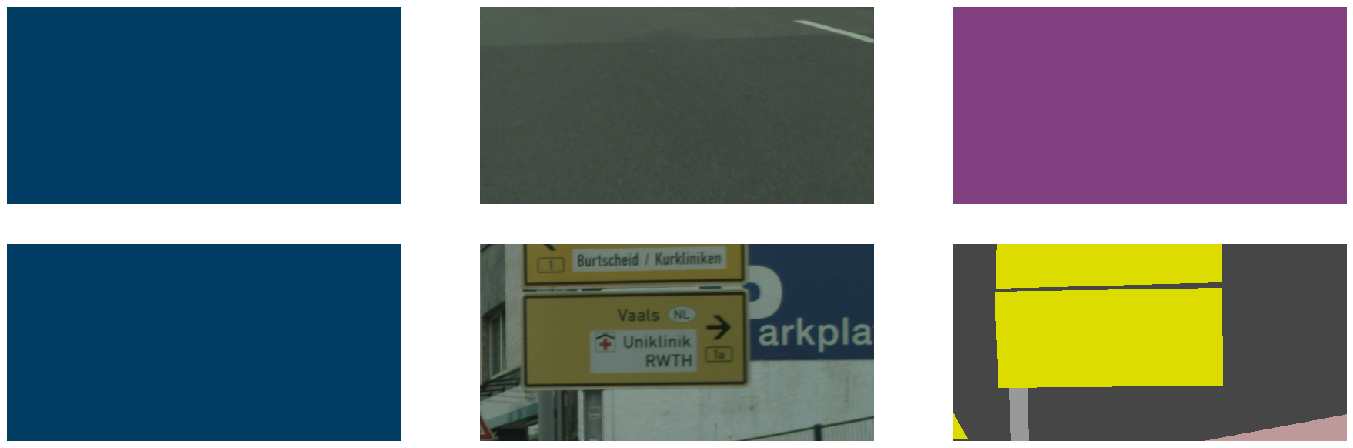

In [7]:
for imgs, lbls in dl_train:
    
    lbls = lbls.squeeze(dim=1)
    
#     preds = utils.predictionsFlattened(learner2, imgs, device)
#     utils.printSegmaps(imgs, lbls, preds)
    
#     preds = utils.predictionsFlattened(learner5, imgs, device)
#     utils.printSegmaps(imgs, lbls, preds)
    
    preds = utils.predictionsFlattened(learner15, imgs, device)
    utils.printSegmaps(imgs, lbls, preds)
    
    break

C:\Users\risha\Anaconda3\envs\Rishabh\lib\site-packages\torch\nn\modules\upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


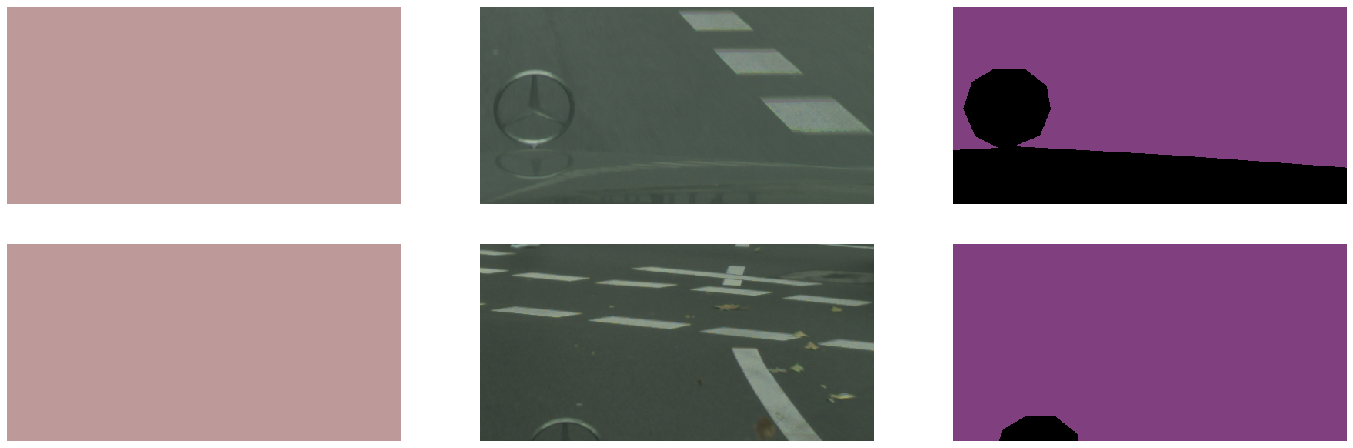

RuntimeError: CUDA out of memory. Tried to allocate 192.00 MiB (GPU 0; 3.00 GiB total capacity; 726.76 MiB already allocated; 163.90 MiB free; 154.86 MiB cached)

In [5]:
learner_new = unet.UNet(3, n_classes).to(device=device)
for imgs, lbls in dl_train:
    
    lbls = lbls.squeeze(dim=1)
        
    preds = utils.predictionsFlattened(learner_new, imgs, device)
    utils.printSegmaps(imgs, lbls, preds)
    
    imgs = imgs.to(device=device)
    pred = learner_new(imgs)
    print(preds[0,:,0,0])
    
    break

In [1]:
import numpy as np
import pandas as pd

In [5]:
A =[1, 2, 3, 4,5 ]
B = [ 2, 3, 4, 5, 6 ]
print(A, B)

[1, 2, 3, 4, 5] [2, 3, 4, 5, 6]


In [11]:
pd.DataFrame(list(zip(A,B)))

,0,1
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6
